## NAVER data science competition 2018
- 참여원
    - 고려대학교 이재융
    - 연세대학교 박해주

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as ses

#### Load data set

In [3]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
answer = pd.get_dummies(data['diagnosis'], drop_first=True)
answer.head()

,M
0,1
1,1
2,1
3,1
4,1


In [6]:
data = pd.concat([data, answer], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

#### Column중 'Unnamed:32"는 불필요해 보입니다, 또한 label이 되는 diagnosis는 one-hot encoding으로 처리하였으니 삭제해줍니다

In [7]:
data.drop('diagnosis', axis=1, inplace=True)
data.drop('Unnamed: 32', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

In [8]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


#### 암환자 데이터 수는: 212개, 정상환자 데이터 수는 357개

In [9]:
cancer_data = data[data['M']== 1]
nocancer_data = data[data['M'] == 0]

In [10]:
print("the cancer data: {}, no cancer data: {}".format(len(cancer_data), len(nocancer_data)))

the cancer data: 212, no cancer data: 357


### 각 데이터들의 boxplot 조사 (1. 정상환자 2. 암 환자 3. 전체 데이터)

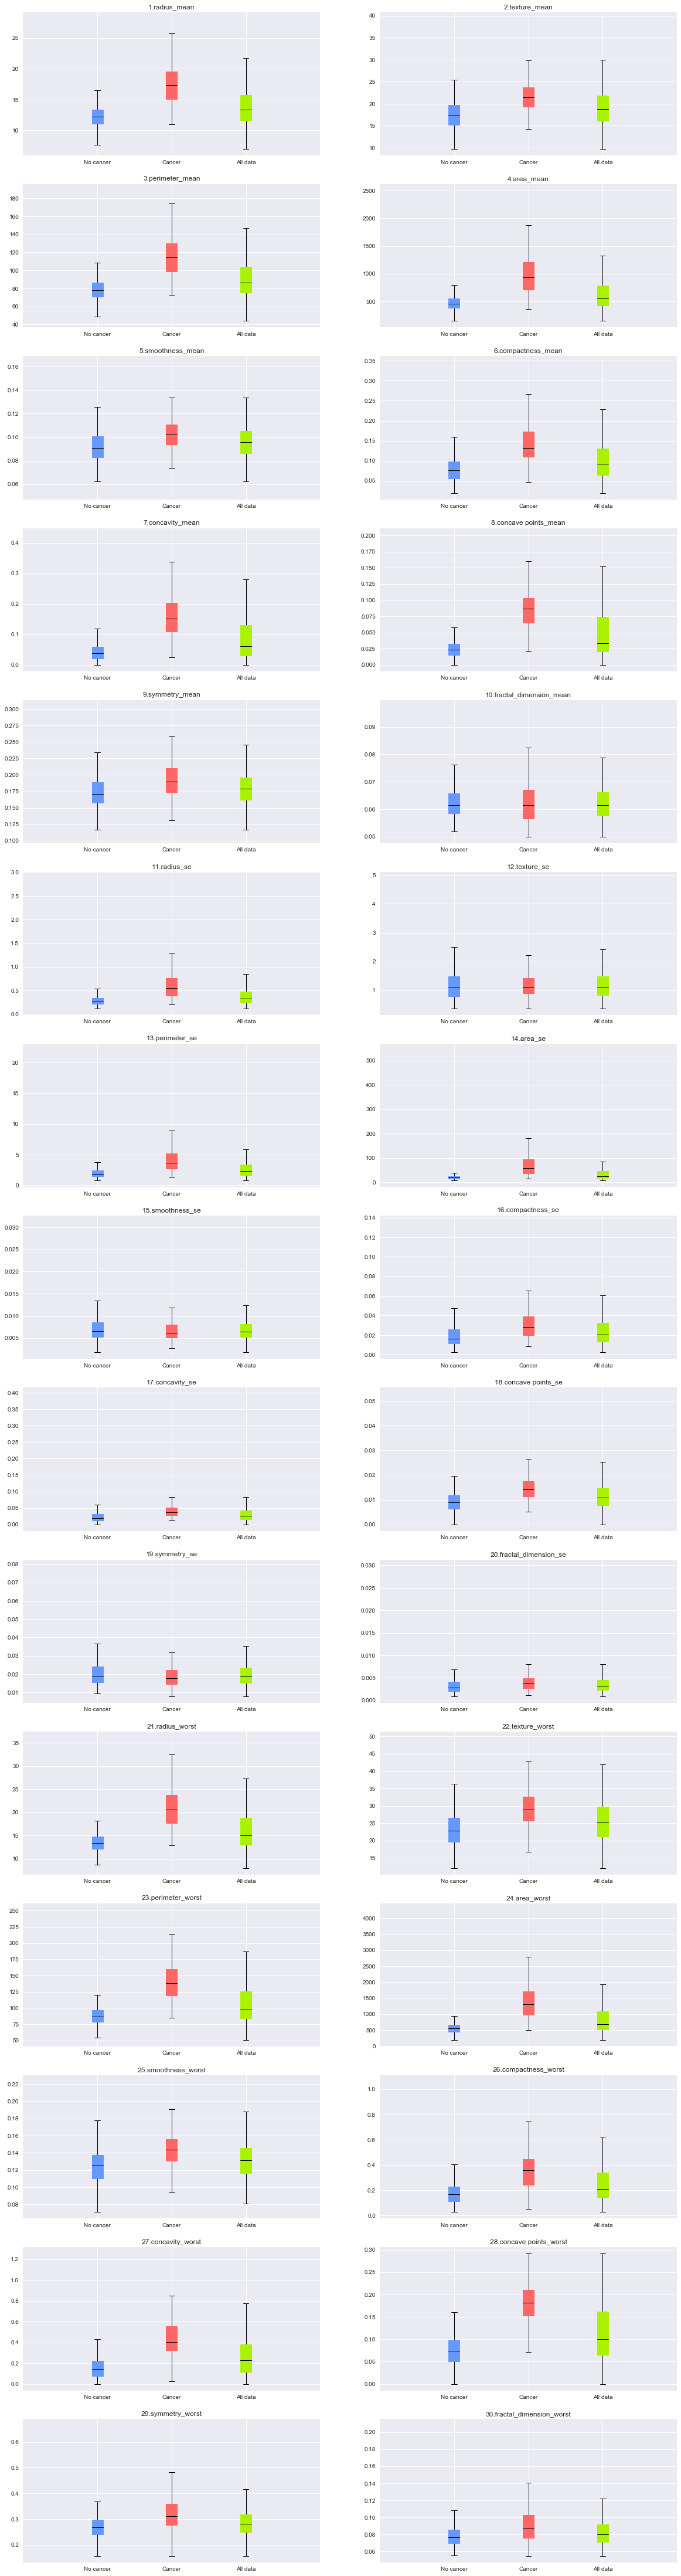

In [10]:
plt.figure(figsize=(20,80))

for index, i in enumerate(data.columns):
    if(i == 'id') or (i=='M'):
        continue
    else:
        plt.subplot(15,2,index)
        plt.title(str(index)+"."+i)
        plt.boxplot(nocancer_data[i], positions=[1], patch_artist=True,
                  boxprops = dict(facecolor='#6699ff', color = '#6699ff'),
                   medianprops=dict(color='black'))
        plt.boxplot(cancer_data[i], positions=[2], patch_artist=True,
                  boxprops = dict(facecolor='#ff6666', color = '#ff6666'),
                   medianprops=dict(color='black'))
        plt.boxplot(data[i], positions=[3], patch_artist=True,
                  boxprops = dict(facecolor='#abf200', color = '#abf200'),
                   medianprops=dict(color='black'))
#         plt.boxplot((nocancer_data[i],cancer_data[i]), patch_artist=True)
        plt.xticks([1, 2, 3], ['No cancer', 'Cancer', 'All data'])
        plt.xlim(0,4)
        

### 데이터 연관성(Correlation)을 조사합니다
- 코드로는 corr()함수를 사용하여 측정

In [11]:
data.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


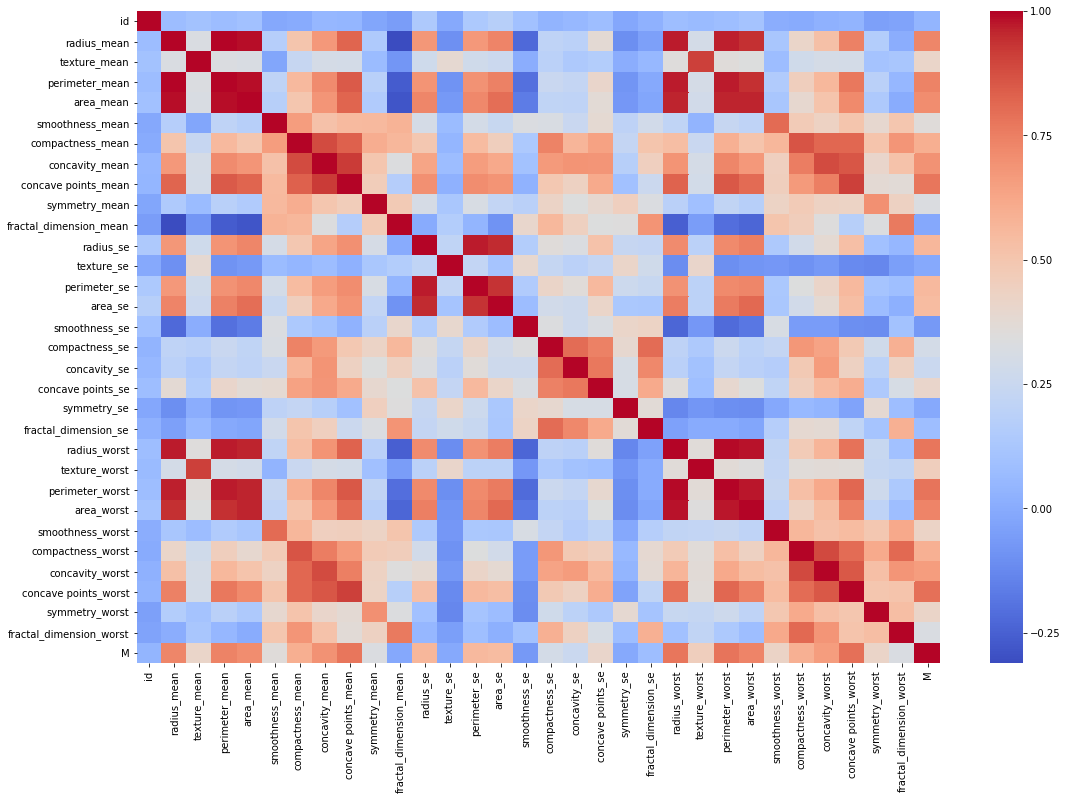

In [12]:
plt.figure(figsize=(18,12))
ses.heatmap(data.corr(),cmap='coolwarm')

In [14]:
data.corr()['M']

id                         0.039769
radius_mean                0.730029
texture_mean               0.415185
perimeter_mean             0.742636
area_mean                  0.708984
smoothness_mean            0.358560
compactness_mean           0.596534
concavity_mean             0.696360
concave points_mean        0.776614
symmetry_mean              0.330499
fractal_dimension_mean    -0.012838
radius_se                  0.567134
texture_se                -0.008303
perimeter_se               0.556141
area_se                    0.548236
smoothness_se             -0.067016
compactness_se             0.292999
concavity_se               0.253730
concave points_se          0.408042
symmetry_se               -0.006522
fractal_dimension_se       0.077972
radius_worst               0.776454
texture_worst              0.456903
perimeter_worst            0.782914
area_worst                 0.733825
smoothness_worst           0.421465
compactness_worst          0.590998
concavity_worst            0

#### Remove unimportant data sets

In [19]:
data.drop('id',axis=1,inplace=True)
data.drop(['texture_se','texture_mean','texture_worst','symmetry_se','smoothness_se'],axis=1,inplace=True)

### Apply machine learning algorithm
- LogisticRegression
- DecisionTreeClassifier
- RandomForestClassifier

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#### Split test, train data set

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(data.drop('M', axis=1), data['M'], test_size=0.33, random_state=53)

In [21]:
X_train.shape

(381, 25)

#### Make machine learning model

In [26]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [27]:
lr.fit(X_train, Y_train)
dt.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Let's predict!

In [28]:
predicted_lr = lr.predict(X_test)
predicted_dt = dt.predict(X_test)
predicted_rf = rf.predict(X_test)

In [29]:
from sklearn.metrics import precision_score

In [32]:
print("LogisticRegression accuracy: {}%".format((precision_score(Y_test, predicted_lr) * 100)))
print("DecisionTree accuracy: {}%".format((precision_score(Y_test, predicted_dt) * 100)))
print("RandomForest accuracy: {}%".format((precision_score(Y_test, predicted_rf) * 100)))

LogisticRegression accuracy: 91.80327868852459%
DecisionTree accuracy: 88.70967741935483%
RandomForest accuracy: 98.21428571428571%


## Result
- Logistic Regression : 92%
- DecisionTree : 89%
- RandomForest : 98%

### Random Forest is best solution to predict cancer patient

### 암에 대한 데이터는 실제로 많지않기때문에 정상:악성의 데이터 비율이 5:5이면 안된다

In [21]:
use50_cancer, _ = train_test_split(cancer_data, test_size = 0.5, random_state = 43)
use30_cancer, _ = train_test_split(cancer_data, test_size = 0.7, random_state = 43)

In [22]:
use50_cancer

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
417,90602302,15.50,21.08,102.90,803.1,0.11200,0.15710,0.15220,0.08481,0.2085,...,27.65,157.10,1748.0,0.15170,0.40020,0.42110,0.21340,0.3003,0.10480,1
196,875938,13.77,22.29,90.63,588.9,0.12000,0.12670,0.13850,0.06526,0.1834,...,34.01,111.60,806.9,0.17370,0.31220,0.38090,0.16730,0.3080,0.09333,1
302,89263202,20.09,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,...,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469,1
265,88995002,20.73,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,...,47.16,214.00,3432.0,0.14010,0.26440,0.34420,0.16590,0.2868,0.08218,1
393,903516,21.61,22.28,144.40,1407.0,0.11670,0.20870,0.28100,0.15620,0.2162,...,28.74,172.00,2081.0,0.15020,0.57170,0.70530,0.24220,0.3828,0.10070,1
28,852973,15.30,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,...,36.71,149.30,1269.0,0.16410,0.61100,0.63350,0.20240,0.4027,0.09876,1
282,89122,19.40,18.18,127.20,1145.0,0.10370,0.14420,0.16260,0.09464,0.1893,...,28.65,152.40,1628.0,0.15180,0.37490,0.43160,0.22520,0.3590,0.07787,1
53,857392,18.22,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.10600,0.2092,...,24.13,135.10,1321.0,0.12800,0.22970,0.26230,0.13250,0.3021,0.07987,1
323,895100,20.34,21.51,135.90,1264.0,0.11700,0.18750,0.25650,0.15040,0.2569,...,31.86,171.10,1938.0,0.15920,0.44920,0.53440,0.26850,0.5558,0.10240,1
317,894326,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,25.00,140.90,1485.0,0.14340,0.27630,0.38530,0.17760,0.2812,0.08198,1


In [23]:
use30_cancer

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
498,914769,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.09183,0.1832,...,22.88,146.40,1600.0,0.14120,0.30890,0.35330,0.16630,0.2510,0.09445,1
258,887181,15.66,23.20,110.20,773.5,0.11090,0.31140,0.31760,0.13770,0.2495,...,31.64,143.70,1226.0,0.15040,0.51720,0.61810,0.24620,0.3277,0.10190,1
26,852763,14.58,21.53,97.41,644.8,0.10540,0.18680,0.14250,0.08783,0.2252,...,33.21,122.40,896.9,0.15250,0.66430,0.55390,0.27010,0.4264,0.12750,1
300,892438,19.53,18.90,129.50,1217.0,0.11500,0.16420,0.21970,0.10620,0.1792,...,26.24,171.10,2053.0,0.14950,0.41160,0.61210,0.19800,0.2968,0.09929,1
73,859983,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,...,20.86,110.30,812.4,0.14110,0.35420,0.27790,0.13830,0.2589,0.10300,1
203,87880,13.81,23.75,91.56,597.8,0.13230,0.17680,0.15580,0.09176,0.2251,...,41.85,128.50,1153.0,0.22260,0.52090,0.46460,0.20130,0.4432,0.10860,1
536,91979701,14.27,22.55,93.77,629.8,0.10380,0.11540,0.14630,0.06139,0.1926,...,34.27,104.30,728.3,0.13800,0.27330,0.42340,0.13620,0.2698,0.08351,1
369,9012000,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,...,25.80,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574,1
194,87556202,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,...,27.78,118.60,784.7,0.13160,0.46480,0.45890,0.17270,0.3000,0.08701,1
400,90439701,17.91,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,...,27.78,149.60,1304.0,0.18730,0.59170,0.90340,0.19640,0.3245,0.11980,1


In [27]:
use30 = pd.concat([nocancer_data, use30_cancer], ignore_index=True)
use50 = pd.concat([nocancer_data, use50_cancer], ignore_index=True)

In [48]:
print(len(nocancer_data))
print(len(use30_cancer))
print(len(use50_cancer))
# use30.drop('id',axis=1,inplace=True)
# use30.drop(['texture_se','texture_mean','texture_worst','symmetry_se','smoothness_se'],axis=1,inplace=True)

357
63
106


In [31]:
use50.drop('id',axis=1,inplace=True)
use50.drop(['texture_se','texture_mean','texture_worst','symmetry_se','smoothness_se'],axis=1,inplace=True)